# École Polytechnique Juillet 2021

**Bruno FREIRE,
Fabiano SOUSA**

Contact: fabiano.msousa@gmail.com,
brunocaf123@gmail.com

# Algorithme de Wilson pour la génération d'Arbres Couvrants Uniformes

## Introduction et Contextualisation

L'Algorithme de Wilson est un algorithme stochastique qui a pour but produire un *arbre couvrante* pour un graphe donné, de façon que tous les tels arbres possibles soient équiprobables. Pour contextualiser, on définit maintenant les notions élémentaires de la théorie de graphes. 

Un *graphe* $G = (V, E)$ est une structure constituée de points et lignes qui les connectent, ou plus précisement, de *sommets* et d'*arcs*. Ainsi, $V(G)$ denote l'ensemble de sommets, et $E(G)$ définit les arcs entre les sommets. En général, ces arcs peuvent être orientés ou pas, ils peuvent posseder des poids, ils peuvent même être multiples entre un même pair de sommets. Dans notre contexte, nous considérons des graphes non-orientés d'abord, mais la notion des arcs orientés sera présente dans la partie de génération des arbres couvrants par l'algorithme de Wilson. 

Définissons ensuite le concept d'un arbre. Un *arbre* est un graphe connexe libre de cycles (on ne considère pas un pair de sommets connectés comme un cycle). Un graphe est *connexe* lorsque pour tout paire de sommets $(u, v)$, il existe un chemin d'arcs connectant $u$ à $v$. Un *cycle* peut être défini quand il existe un pair de sommets rélié par au moins deux chemins distincts. On peut aussi montrer que la relation $|V| = |E| + 1$ caractérise un graphe (fini) connexe comme étant un arbre. 

Un arbre *couvrant* pour un graphe connexe $G$, est un *sous-graphe* de $G$, qui contient tous les sommets de $G$, mais qui garde juste les arcs nécessaires pour rester connexe, autrement dit, c'est un arbre qui "couvre" tous les sommets de $G$. Un tel arbre peut ne pas être unique, mais il existe toujours (dès que $G$ soit connexe). Trouver des arbres couvrants pour des graphes possède de nombreuses applications en plusieurs problèmes, et il y a plusieurs algorithmes qui le font de différentes manières. Par exemple, l'Algorithme de Recherche en Profondeur, une façon standard de parcourir un graphe, produit à la fin un arbre couvrant pour ce graphe. L'Algorithme de Primm, par ailleurs, sert à trouver des *arbres couvrants minimaux* pour un graphe, c'est-à-dire un arbre couvrant avec la propriété que, pour un sommet choisi comme la racine de l'arbre, tous les autres sommets sont connectés à lui par les chemins le plus courts. Mais tous ces algorithmes sont, en un certain sens, *biaisés* lors du choix de l'arbre couvrant. Ils produisent des arbres de manière essentiellement deterministe, et donc pour un même graphe, ils produisent toujours le même arbre. 

L'algorithme de Wilson, lui, se propose donc à "échantilloner" un arbre couvrant pour un graphe, de façon que ce soit parfaitement aléatoire. Autrement dit, que la distribution de probabilité sur l'ensemble de tous les arbres couvrants possibles soit uniforme. Pour ce faire, l'algorithme commence par choisir un sommet au hasard, et le définir comme la racine (en effet, comme la totalité) d'un arbre, $T_0$. Ensuite, il va itérer des étapes d'expansion de l'arbre produit. À chaque étape, il engendre une marche aléatoire partant d'un sommet non compris par l'arbre, jusqu'à ce que la marche rencontre l'arbre en train d'être construit. 

Cette marche aléatoire consiste essentiellement en une marche simple dans le graphe $G$. Cela veut dire que, à chaque pas, la marche saute vers un sommet, choisi parmi les voisins du sommet courant, avec probabilité uniforme. Néanmoins, le but de cette marche est d'intégrer le chemin produit par la marche au reste de l'arbre, et pour ce faire, il ne faut pas qu'il y ait des sommets répétés, c'est dire, des cycles dans ce chemin. Pour cela, l'algorithme a une importante étape de *suppression des cycles*, dont le fonctionnement est centrale pour les bonnes propriétés de finitude et de compléxité de l'algorithme. Dans la suite, nous montrons alors les bonnes propriétés de cette procedure, et comment cela nous permet de montrer que l'Algorithme de Wilson, de fait, fonctionne, c'est-à-dire, qu'il termine et qu'il produit vraiment un arbre couvrant uniformément aléatoire. 

# 1. Partie Théorique


## T1.  
***Prouver que pour tout cycle $C$ suppressible, et tout cycle $C'$ directement suppressible, alors on peut supprimer $C$ via une séquence de cycles qui commence par le cycle $C'$.***


On commence la preuve en remarquant que, si deux cycles $C_a$, $C_b$ sont directement suppressibles, alors soit ils sont disjoints, soit ils sont égaux. En effet, s'il y a une intersection non-vide entre $C_a$ et $C_b$, il y au moins un sommet $k_0$ dans les deux cycles. Puisque les cycles sont directement suppressibles, on sait que le prochain sommet de chaque cycle est donné également par $k_1 = A^{t_0}_{k_0}$, (où $t_0 = 1$ si on admet qu'aucun cycle n'a été supprimé avant) et puis par récurrence, toute la séquence de sommets de chaque cycles sera égale à partir de $k_0$. Mais encore, puisque ce sont des cycles, on aboutira à $k_0$ à nouveau après parcourir tous les sommets des deux cycles. Ainsi, les deux cycles seront soit égaux, soit disjoints. 

On peut maintenant prouver le résultat souhaité. Étant donné $C$ supressible, soit $C_1,\dots,C_n = C$ une séquence de cycles *séquentiellement supressibles*. Si $C'$ est disjoint de tous les $C_i, 1\le i\le n$, alors la suppression de $C'$ n'affecte pas la suppressibilité de $C$, i.e., on peut simplement supprimer $C'$ et puis supprimer toute la séquence $C_1, \dots, C_n = C$. Traitons donc le cas où $C'$ a une intersection avec un des cycles de la séquence. 

Soit $C_j, 1 \le j \le n$, le premier cycle de cette séquence qui intersecte $C'$. D'après la remarque antérieure, cela entraîne $C' = C_j$. Ensuite, par la minimalité de $j$, on sait que $C_j = C'$ est disjoint de tous les $C_i, 1\le i < j$, et étant directement suppressible, on peut alors effectuer la suppression de $C_j$ avant tous les autres. Ainsi, la séquence $(C' = C_j, C_1, \dots, C_{j-1}, C_{j+1}, \dots, C_n = C)$ est bien séquentiellement supressible, et donc on peut bien supprimer $C$ via une séquence de cycles commençant par $C'$. 



## T2.
***En déduire que seuls deux scénarios sont possibles: soit après chaque suppression d’un cycle
arbitraire, il reste toujours un cycle qu’on peut encore supprimer (le processus de suppression des
cycles ne termine jamais), soit le processus de suppression des cycles termine, auquel cas les cycles
enlevés ne dépendent pas de l’ordre dans lequel on les a enlevés, et les valeurs au sommet des piles
dans la configuration terminale ne dépendent pas non plus de cet ordre.***

Posons d'abord $\mathcal{C}$ égale à l'ensemble de tous les cycles suppressibles pour une certaine réalisation de l'algorithme, c'est-à-dire, pour chaque $\omega \in \Omega$ (le domaine de tous les variables aléatoires $A_k^t, \forall k, \forall t$), on associe l'ensemble (aléatoire) $\mathcal{C}(\omega) = \{C ~|~ C \text{ est un cycle suppressible}\}$. 

Alors, pour chaque $\omega \in \Omega$, cet ensemble est soit fini soit infini. S'il existe un nombre infini de cycles suppressibles, le processus de suppression ne termine jamais, puisque d'après le résultat de **T1**, la suppression d'un cycle n'affecte pas la suppressibilité des autres cycles. Autrement dit, après la suppression d'un cycle $C_0$, le nouvel ensemble $\mathcal{C}'(\omega)$ est juste $\mathcal{C}(\omega)\setminus\{C_0\}$. Donc, si $\mathcal{C}(\omega)$ est infini, de même sera le processus de suppression des cycles. 

Pour cette même raison, si $\mathcal{C}(\omega)$ est fini, le processus de suppression des cycles termine lorsque tous les cycles dans $\mathcal{C}(\omega)$ seront enlevés, et puisque $\mathcal{C}(\omega)$ est "stable" après chaque suppression, cela arrive dans un nombre d'étapes fini. En outre, l'ensemble des cycles enlevés sera toujours $\mathcal{C}(\omega)$, donc l'ordre dans lequel ils sont supprimés n'importe pas. 

La relation avec les valeurs au sommet des piles est simples: lors de la suppression d'un cycle $C = (k_0, k_1 = A_{k_0}^{t_0}, \dots, k_{j+1} = A_{k_j}^{t_j}, \dots, k_0 = A_{k_n}^{t_n})$, les valeurs $A_{k_j}^{t_j}$ sont bien au sommet des piles respectives, et puis elles sont remplacées par $A_{k_j}^{t_j+1}$. Si on note pour chaque sommet $k$, le nombre de cycles dans $\mathcal{C}(\omega)$ qui passent par $k$ comme $\tau(k)$, on a alors que à la fin du processus de suppression des cycles, les valeurs au sommet des piles seront données par $A_k^{\tau(k)+1}, \forall k$. Et cela ne dépend pas non plus de l'ordre de suppression, puisque les mêmes cycles seront supprimés indépendamment de cet ordre, et l'effet d'une suppression sur les valeurs au sommet des piles est commutatif (il s'agit de incrémenter l'indice $t$ de $A_k^t$ pour tout $k \in V(C)$, donc si on supprime les cycles $C_a, C_b$ dans cet ordre ou l'inverse, l'effet sera également l'incrément de $t$ dans $A_k^t$ pour tout $k \in V(C_a) \cup V(C_b)$, et puis une autre fois pour $k \in V(C_a) \cap V(C_b)$). 


## T3.
***Montrer qu’avec probabilité 1, l’algorithme de Wilson termine en un nombre d’étapes fini. En
interprétant l’algorithme de Wilson comme un enlèvement de cycles, en déduire que avec probabilité 1
le processus de suppression des cycles termine.***

À chaque étape $i$ de l'algorithme de Wilson, on engendre une marche aléatoire à partir d'un sommet $u \in V\setminus V(T_{i-1})$ jusqu'à un sommet de $T_{i-1}$. Puisque le graphe $G$ est fini, il suffit de montrer que chaque étape termine presque sûrement. Si la marche aléatoire arrive à $T_{i-1}$ en temps fini (p.s.), on aura forcement un nombre fini de cycles à supprimer, et puis le processus de suppression des cycles termine presque sûrement. 

Alors il faut montrer que à l'étape $i$, la marche aléatoire arrive à $T_{i-1}$ presque sûrement. Définissons les évenements $A_n = \left\{U_k \notin T_{i-1}, \text{ pour } n |G| < k \le (n+1) |G|\right\}$, et $B_n = \bigcap_\limits{0\le k\le n} A_k$. Nous allons utiliser la fait que $(B_n)_{n\ge0}$ est une suite décroissante d'évenements pour appliquer le Théorème de Borel-Cantelli. 

La décroissance nous permet de calculer $\mathbb{P}[B_n]$ comme:

\begin{equation*}
\mathbb{P}[B_n] = \mathbb{P}[B_n | B_{n-1}]\cdot\mathbb{P}[B_{n-1}] = \mathbb{P}[A_n ~|~ U_{n |G|} \notin T_{i-1}] \cdot\mathbb{P}[B_{n-1}],
\end{equation*}

où la première égalité est due à la décroissance, et la deuxième est grâce à la propriété de Markov. 


Puisque $G$ est connexe, il existe toujours un chemin entre deux sommets quelconques, de longueur au maximum $|G|$. Alors, la probabilité que la marche visite un sommet de $T_{i-1}$ dans $|G|$ sauts est plus grande que $\left(\max_\limits{k\in G} d_k\right)^{-|G|} > 0$. Par conséquent, on aura que 

\begin{equation*}
\mathbb{P}[A_n | U_{n |G|} \notin T_{i-1}] \le \underbrace{1 - \left(\max_\limits{k\in G} d_k\right)^{-|G|}}_p < 1. 
\end{equation*}

En raisonnant par récurrence, on montre alors que $\mathbb{P}[B_n] \le p\cdot\mathbb{P}[B_{n-1}] \le p^n\cdot\mathbb{P}[B_0] = p^n\cdot\mathbb{P}[A_0] \le p^{n+1}$. Puis, on aura que $\sum_\limits{n\ge0} \mathbb{P}[B_n] = \sum_\limits{n\ge0} p^{n+1} = \dfrac{p}{1-p} < +\infty$. Ainsi, par Borel-Cantelli, on a que $\mathbb{P}[\limsup_n B_n] = 0$, ce qui implique que, avec probabilité $1$, les évenements $B_n$ ne se produisent qu'un nombre fini de fois. 

Autrement dit, la marche aléatoire ne se confine à $G \setminus T_{i-1}$ que pour un nombre fini de pas, et puis, elle atteint $T_{i-1}$ dans un nombre fini de pas, presque sûrement. Alors, comme l'étape $i$ de l'algorithme termine en temps fini presque sûrement $\forall i$, le nombre de cycles à supprimer à chaque étape est bien fini. Finalement, étant le graphe fini, on n'a qu'un nombre fini d'étapes à réaliser. Ainsi, l'algorithme de Wilson, aussi bien que le processus de suppression de cycles, termine en un nombre d'étapes fini avec probabilité $1$.


## T4.
***Soit $C_1, \dots, C_M$ l’ensemble de cycles enlevables étant données les piles $\{A^t_k\}_{t\ge1}, k \in V \setminus \{r\}$, et soit $\vec{T}$ le graphe orienté, libre de cycles, obtenu dans la configuration terminale après suppression des cycles. Justifier que la collection de cycles $\{C_1, \dots, C_M\}$ est indépendante de $\vec{T}$. En déduire que l’arbre $T$ obtenu en retirant l’orientation des arcs de $\vec{T}$ est uniformément distribué parmi les arbres couvrants de G.***

On peut calculer la probabilité jointe d'obtenir une graphe orienté $\vec{T}$, libre de cycles, à travers de la suppression d'un ensemble de cycles $\mathcal{C} = \{C_1, \dots, C_M\}$, notée $\mathbb{P}[\vec{T}, \mathcal{C}]$. En admettant que les cycles sont supprimés dans l'ordre $C_1, \dots, C_M$, on utilise le fait que pour chaque $k$, la pile $(A_k^t)_{t\ge1}$ est i.i.d., pour montrer que la probabilité d'obtenir $\vec{T}$ en supprimant séquentiellement les cycles $C_1, \dots, C_M$ sera donnée par

\begin{equation*}
\mathbb{P}[\vec{T}, \{C_1, \dots, C_M\}] = \mathbb{P}[C_1] \cdot \mathbb{P}[\vec{T}, \{C_2, \dots, C_M\}] = \left(\prod_\limits{1\le j\le M}\mathbb{P}[C_j]\right) \cdot \mathbb{P}[\vec{T}],
\end{equation*}

où $\mathbb{P}[C_j] = \prod_\limits{(k, \ell) \in E(C_j)} \mathbb{P}[A_k^{t_{k j}} = \ell]$, où chaque probabilité $\mathbb{P}[A_k^t = \ell]$ est donnée par le processus de Markov associée à la marche aléatoire. 

On voit alors, que la probabilité jointe $\mathbb{P}[\vec{T}, \mathcal{C}]$ se factorise comme $\mathbb{P}[\mathcal{C}] \cdot \mathbb{P}[\vec{T}]$. Donc, $\vec{T}$ et $\mathcal{C}$ sont bien indépendants. 

Ensuite, pour montrer que les arbres couvrantes sont bien uniformément distribuées, on observe que, pour un ensemble de cycles $\mathcal{C}$ quelconque, il existe une injection à partir de l'ensemble de tous les arbres couvrantes possibles, $\{\vec{T}\}$ vers l'ensemble de tous les configurations possibles des sommets des piles, $\{A_k^1\}_{k\in G}$. Puisque la configuration des sommets des piles est uniformément distribuée, le même vaut pour la distribution des arbres $\{\vec{T}\}$, étant donné l'ensemble de cycles $\mathcal{C}$. 

En termes plus formelles, soit $\tau = (\omega \mapsto \vec{T}(\omega))$ la variable aléatoire qui répresente l'arbre couvrante obtenue à la fin de l'algorithme, $\pi = (\omega \mapsto \{A_k^1\}_{k\in G})$ la v.a. qui répresente la configuration des sommets des piles. Nous avons donc pour chaque $\mathcal{C}$ une fonction injective $f_\mathcal{C} = \left(\vec{T} \mapsto \{A_k^1\}_{k\in G}\right)$. 

Alors, $\mathbb{P}[\pi = f_\mathcal{C}(\vec{T})] = \mathbb{P}[\tau = \vec{T} | \mathcal{C}]$. Puisque la loi de $\pi$ est uniforme, la loi de la restriction de $\pi$ à l'image de $f_\mathcal{C}$ sera également uniforme, et puis par l'égalité précedente, la loi conditionnelle de $\tau$, étant donné $\mathcal{C}$ est aussi uniforme. Finalement, puisque $\vec{T}$ et $\mathcal{C}$ sont indépendants, $\mathbb{P}[\tau = \vec{T} | \mathcal{C}] = \mathbb{P}[\tau = \vec{T}]$, et ainsi la loi de $\tau$ est bien uniforme. Autrement dit, $\vec{T}$ est uniformément distribué parmi les graphes orientés libres de cycles, et puis l'arbre $T$ même sera aussi uniformément distribué parmi les arbres couvrantes de $G$, puisque à chaque arbre $T$ est associé un même nombre de graphes orientés libres de cycles $\vec{T}$ (essentiellement, $2^{|G|-1}$). 



# 2. Partie Simulation

# S1. 
***Implémenter l’algorithme de Wilson: en prenant comme entrée un graphe non orienté G, obtenir
en sortie un échantillon uniforme d’un arbre couvrant de G.***

In [4]:
import random as rd
import networkx as nx
#Nous avons vraiment essayé de n'utilier d'autres biblioteques que celles indiquès, mais pour les graphes, aucune des sugères était capable de les imprimer exactement comme on voulait
# Nous pouvions faire une grid 2n+1x2n+1 en matplotlib mais la representation par grid ne serait pas exactement representatif visuellement d'un graphique
import matplotlib.pyplot as plt

#graph = {}
#Définir le graphe ci-dessus, le format doit être celui d'un dictionnaire dont les clés sont les numéros des noeuds, de 0 à n-1 (n étant la taille du graphe) et les entrées correspondantes du dictionnaire une liste des noeuds adjacents au noeud clé.
#Puisque le code ne fonctionnera pas sans un graphe, un lattice carré standard est utilisé juste en dessous de la définition de la fonction treillis, commentez-le et insérez le graphe souhaité pour obtenir le résultat de l'algorithme (les arêtes du graphe formant l'arbre spanning).

#Cette fonction définit le dictionnaire représentant le graphique de la grille rectangulaire à utiliser ultérieurement
def gen_grille(n):
    grille = {}
    for y in range(n):
        for x in range(1, n+1):
            adj =[(y)*n+(x-1),(y+1)*n+(x),(y)*n+(x+1),(y-1)*n+(x)]
            if(x==1):
                adj.remove((y)*n+(x-1))
            if(x==n):
                adj.remove((y)*n+(x+1))
            if(y==0):
                adj.remove((y-1)*n+(x))
            if(y==n-1):
                adj.remove((y+1)*n+(x))

            grille[(y)*n+(x)]=adj

    return grille

#cette affectation OVERRIDES le graphique défini par l'entrée de l'utilisateur ci-dessus, vous devez le commenter afin de le faire fonctionner pour l'entrée de l'utilisateur donnée.
graph = gen_grille(10)

#Cette fonction définit le dictionnaire représentant le graphique de la grille triangulaire qui sera utilisé ultérieurement.
def gen_grille_tri(n):
    grille = {}
    for y in range(n):
        for x in range(1, n+1):
            adj =[(y)*n+(x-1),(y+1)*n+(x),(y)*n+(x+1),(y-1)*n+(x),(y-1)*n+(x-1), (y+1)*n+(x+1)]
            if(x==1):
                adj.remove((y)*n+(x-1))
                adj.remove((y-1)*n+(x-1))
            if(x==n):
                adj.remove((y)*n+(x+1))
                adj.remove((y+1)*n+(x+1))
            if(y==0):
                adj.remove((y-1)*n+(x))
                if(x!=1):
                    adj.remove((y-1)*n+(x-1))
            if(y==n-1):
                adj.remove((y+1)*n+(x))
                if(x!=n):
                    adj.remove((y+1)*n+(x+1))

            grille[(y)*n+(x)]=adj

    return grille

#Cette fonction vérifie si une marche donnée a encore des boucles, elle est appelée pendant l'exécution de l'algorithme principal.  
def loops_remaining(walk):
    for i in walk:
        if walk.count(i)>1:
            return True
    return False

#Cette fonction est simplement un formatage de la sortie de l'algorithme principal, pour qu'au lieu d'avoir la séquence de chemins qui compose l'arbre final, elle décompose individuellement les chemins en arêtes qui les composent.
#les chemins en leurs arêtes constitutives et produit donc un ensemble de toutes les arêtes du graphe final.

def wilson_spanning(paths):
    edges_final=[]
    for i in paths:
        edges_add = []
        for j in range(len(i)-1):
            edges_add.append([i[j],i[j+1]])
        edges_final.extend(edges_add)
    return edges_final

#Main lagorithm
def main_alg(graph_input):
    graph = graph_input
    graph_list = list(graph.items())

    #filling the edges list
    edges = []
    for vertex in graph:
        for n in graph[vertex]:
            edges.append({vertex, n})

    #Initial step before entering in the while cycle, initializes the walk and the root r of the tree
    paths = []
    r = rd.choice(graph_list)[0]
    tree = [r]
    remaining = graph
    remaining.pop(r)

    #Lorsqu'il en reste des ponits hors de l'arbre..
    while remaining:
        #start the walk
        walk = []
        u = rd.choice(list(remaining.items()))[0]
        walk.append(u)
        chosen = rd.choice(graph[u])
        walk.append(chosen)
        
        #Continuez à choisir l'étape suivante jusqu'à ce que vous atteigniez l'arbre...
        while chosen not in tree:
            chosen = rd.choice(graph[chosen])
            walk.append(chosen)
        
        #Now you have a walk that hits the tree (almost surely in finite time by the item T.3), with possible cycles, we take away it's cycles until there aren't any more
        #Again, this process happens almost surely in finite time as proven above
        while(loops_remaining(walk)):
            passed = []
            for i in range(len(walk)):
                if(walk[i] not in passed):
                    passed.append(walk[i])
                else:
                    start = walk.index(walk[i])
                    for j in range(start,i):
                        walk.pop(start)
                    break
        
        #Ici, nous enlevons le dernier nœud de la marche puisqu'il fait déjà partie de l'arbre (c'est le point où il a touché l'arbre et s'est arrêté après tout).
        popped = walk.pop()
        tree.extend(walk)

        #La nouvelle partie de l'arbre est retirée des nœuds possibles à sélectionner pour commencer une promenade.
        for i in walk:
            remaining.pop(i)
        
        #Ici, nous insérons à nouveau la dernière partie du chemin car, sinon, nous n'aurons pas l'arête entre le dernier nœud de la marche et le point de connexion.
        walk.append(popped)
        paths.append(walk)
    return paths

print("Edges from Wilson algorithm:", wilson_spanning(main_alg(graph)))

Edges from Wilson algorithm: [[63, 53], [53, 52], [52, 42], [42, 32], [32, 33], [33, 34], [34, 35], [35, 36], [36, 26], [100, 99], [99, 89], [89, 90], [90, 80], [80, 79], [79, 78], [78, 68], [68, 67], [67, 66], [66, 76], [76, 75], [75, 74], [74, 64], [64, 63], [28, 38], [38, 48], [48, 49], [49, 39], [39, 29], [29, 30], [30, 20], [20, 19], [19, 18], [18, 8], [8, 7], [7, 6], [6, 5], [5, 4], [4, 14], [14, 24], [24, 23], [23, 33], [43, 33], [85, 95], [95, 96], [96, 86], [86, 76], [73, 83], [83, 93], [93, 94], [94, 84], [84, 85], [61, 71], [71, 81], [81, 82], [82, 92], [92, 93], [1, 11], [11, 21], [21, 31], [31, 32], [59, 58], [58, 57], [57, 67], [47, 46], [46, 36], [17, 18], [65, 75], [40, 30], [16, 26], [15, 14], [51, 41], [41, 31], [3, 2], [2, 1], [37, 27], [27, 17], [70, 80], [44, 45], [45, 35], [12, 13], [13, 23], [88, 98], [98, 97], [97, 96], [77, 67], [56, 46], [10, 20], [25, 26], [50, 60], [60, 70], [69, 68], [54, 64], [72, 82], [62, 52], [91, 81], [22, 32], [9, 8], [55, 45], [87, 9

---
## S2. 
***Tester l'algorithme avec $G = (V,E)$ une grille à deux dimensions, c'est-à-dire pour $V = \{(x,y), x \in \{1,\dots,n\}, y \in \{1,\dots,n\}\}$ et $E = \{\{(x,y),(x',y')\} \in V^2 : \lvert x-x'\rvert  + \lvert y-y'\rvert = 1\}$. Engendrer des images de 2 arbres couvrants résultants pour la grille avec $n=10$, puis avec $n=50$.***

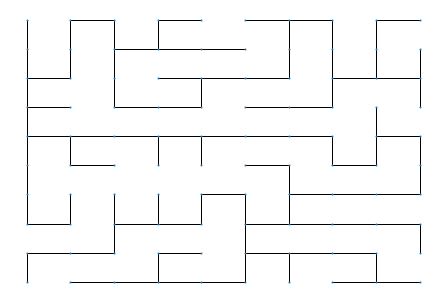

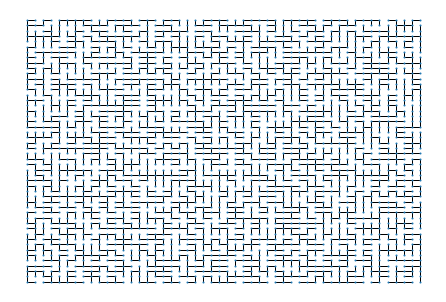

In [5]:
#Ici, nous générons simplement un graphe et ajoutons les sommets en suivant les règles décrites.
#Ensuite nous ajoutons les arêtes selon le résultat de la fonction wilson_spanning
# (c'est-à-dire la fonction qui nous amène d'un dictionnaire à son ensemble d'arêtes) du dictionnaire
# qui décrit l'arbre spanning à partir du graphe initial donné.

def Gen_graph_rect(size):
    G = nx.Graph()
    for i in gen_grille(size):
        G.add_node(i, pos=((i-1)%size, ((i-1)-(i-1)%size)/size))

    for j in wilson_spanning(main_alg(gen_grille(size))):
        G.add_edge(j[0], j[1])

    #Imprimer le graphique en fonction de la géométrie de l'objet. 
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, node_size = 1, with_labels = False)
    plt.savefig("simple_path.png") # save as png
    plt.show() # display

#imprimer le graphique pour la taille désirée
Gen_graph_rect(10)
Gen_graph_rect(50)

---
# S3.
***Tester l'algorithme avec $G = (V,E)$ une grille triangulaire, i.e $V = \{(x,y), x \in \{1,\dots,n\}, y \in \{1,\dots,n\}\}$ et $E = \{\{(x,y),(x',y'))\} \in V^2:$ soit $x=x' et \mid y-y'\mid = 1\}$, soit $x'=x+1$ et $y' \in \{y, y+1\}\}$. Engendrer des images de 2 arbres couvrants résultants pour la grille triangulaire avec $n=0$, puis avec $n=50$.***

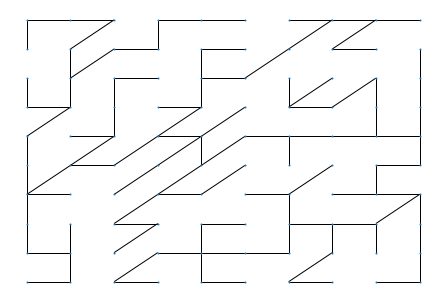

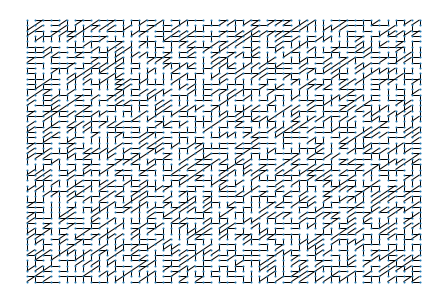

In [3]:
#Ici, nous générons simplement un graphe et ajoutons les sommets en suivant les règles décrites.
#Ensuite nous ajoutons les arêtes selon le résultat de la fonction wilson_spanning
# (c'est-à-dire la fonction qui nous amène d'un dictionnaire à son ensemble d'arêtes) du dictionnaire
# qui décrit l'arbre spanning à partir du graphe initial donné.

def Gen_graph_tri(size):
    G = nx.Graph()
    for i in gen_grille(size):
        G.add_node(i, pos=((i-1)%size, ((i-1)-(i-1)%size)/size))

    for j in wilson_spanning(main_alg(gen_grille_tri(size))):
        G.add_edge(j[0], j[1])

    #imprimer le graphique avec chaque nœud à la bonne position géométrique.
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, node_size = 1, with_labels = False)
    plt.savefig("simple_path.png") # save as png
    plt.show() # display
    
#générer des graphiques pour les tailles 10 et 50
Gen_graph_tri(10)
Gen_graph_tri(50)